# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
df= pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


# EDA

### Statistical EDA

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.shape

(13320, 9)

In [8]:
# Examing the area type feature

df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
# Dropping the unnecessary colum like availability, area type, society and balcony.
df=df.drop(columns=['area_type','availability','society','balcony'],axis=1)

In [10]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [11]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Checking for missing value

In [12]:
# Checking the null values for new columns
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
# Dropping the rows with NA values as the NA values are very small.
df2=df.dropna()

In [14]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df2.shape

(13246, 5)

In [16]:
# Looking for the Size feature
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
# Creating a new column to specify the 'bhk' 
df2['bhk']= df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ebineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
# droping the size column
df2=df2.drop(columns='size')

In [20]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [21]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
# Removing the range value from total_sqft like '1133 - 1384'

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
df2[~df2['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [24]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)== 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
convert_sqft_to_num('2166')

2166.0

In [26]:
convert_sqft_to_num('1115 - 1130')

1122.5

In [27]:
convert_sqft_to_num('5.31Acres') # Did not return anything.. None

In [28]:
df3= df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)

In [29]:
df3.head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [30]:
df3['preice_per_sq_ft']=df3['price']*100000/df3['total_sqft']

In [31]:
df3.head()

,location,total_sqft,bath,price,bhk,preice_per_sq_ft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


# One Hot Encoding for the Categorical feature

In [32]:
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [33]:
len(df3.location.unique())

1304

In [34]:
df3.location= df3.location.apply(lambda x: x.strip())

location_stats= df3.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [35]:
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [36]:
len(location_stats[location_stats<=10])

1052

In [37]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [38]:
len(df3.location.unique())

1293

In [39]:
df3.location= df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [40]:
len(df3.location.unique())

242

# Outlier Detection and removal

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   location          13246 non-null  object 
 1   total_sqft        13200 non-null  float64
 2   bath              13246 non-null  float64
 3   price             13246 non-null  float64
 4   bhk               13246 non-null  int64  
 5   preice_per_sq_ft  13200 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 724.4+ KB


In [42]:
# checking for the abnormility betweeen bhk and sq ft
# like 600 total_sqft but 8 bhk is impossible So we need to remove data like this.
df3[df3.total_sqft/df3.bhk<300].head()

,location,total_sqft,bath,price,bhk,preice_per_sq_ft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [43]:
df3.shape

(13246, 6)

In [44]:
# removing the abnormal data found above 
df4= df3[~(df3.total_sqft/df3.bhk<300)]
df4.shape

(12502, 6)

In [ ]:
# CLT outlier treatment 

In [45]:
num=df4.drop(columns=['location'],axis=1)

In [46]:
num.head()

,total_sqft,bath,price,bhk,preice_per_sq_ft
0,1056.0,2.0,39.07,2,3699.810606
1,2600.0,5.0,120.00,4,4615.384615
2,1440.0,2.0,62.00,3,4305.555556
3,1521.0,3.0,95.00,3,6245.890861
4,1200.0,2.0,51.00,2,4250.000000


In [47]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,total_sqft,bath,price,bhk,preice_per_sq_ft
count,12456.000000,12502.000000,12502.000000,12502.000000,12456.000000
mean,1590.189927,2.564790,111.311915,2.650696,6308.502826
std,1260.404795,1.084946,152.089966,0.981698,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
1%,520.000000,1.000000,19.003300,1.000000,2546.564577
5%,750.000000,1.000000,31.902500,1.000000,3090.909091
10%,945.000000,2.000000,37.932000,2.000000,3500.000000
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667


In [48]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [49]:
num =num.apply(lambda x : outlier_cap(x))

In [50]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,total_sqft,bath,price,bhk,preice_per_sq_ft
count,12456.000000,12502.000000,12502.000000,12502.000000,12456.000000
mean,1550.756388,2.547352,106.402828,2.635018,6224.732845
std,789.170647,0.999459,107.462373,0.900523,3350.079384
min,520.000000,1.000000,19.003300,1.000000,2546.564577
1%,520.000000,1.000000,19.006567,1.000000,2546.897456
5%,750.000000,1.000000,31.902500,1.000000,3090.909091
10%,945.000000,2.000000,37.932000,2.000000,3500.000000
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667


In [51]:
num.shape

(12502, 5)

In [52]:
num['locations']=df4['location']

In [53]:
num.head()

,total_sqft,bath,price,bhk,preice_per_sq_ft,locations
0,1056.0,2.0,39.07,2,3699.810606,Electronic City Phase II
1,2600.0,5.0,120.00,4,4615.384615,Chikka Tirupathi
2,1440.0,2.0,62.00,3,4305.555556,Uttarahalli
3,1521.0,3.0,95.00,3,6245.890861,Lingadheeranahalli
4,1200.0,2.0,51.00,2,4250.000000,Kothanur


In [54]:
num.shape

(12502, 6)

In [55]:
num.preice_per_sq_ft.describe()

count    12456.000000
mean      6224.732845
std       3350.079384
min       2546.564577
25%       4210.526316
50%       5294.117647
75%       6916.666667
max      21735.173505
Name: preice_per_sq_ft, dtype: float64

In [69]:
# Checking if property price for 3bhk is more than property price for 2 bhk
# using a scatterplot


def plot_scatter_chart(df,locations):
    bhk2= df[(df.locations==locations) & (df.bhk==2)]
    bhk3= df[(df.locations==locations) & (df.bhk==3)]
    plt.rcParams["figure.figsize"] = (20,10)
    plt.scatter(bhk2.total_sqft,bhk2.preice_per_sq_ft,color='blue',label='2BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.preice_per_sq_ft,marker='+',color='green',label='3BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet Area')
    plt.title('location')
    plt.legend()

    

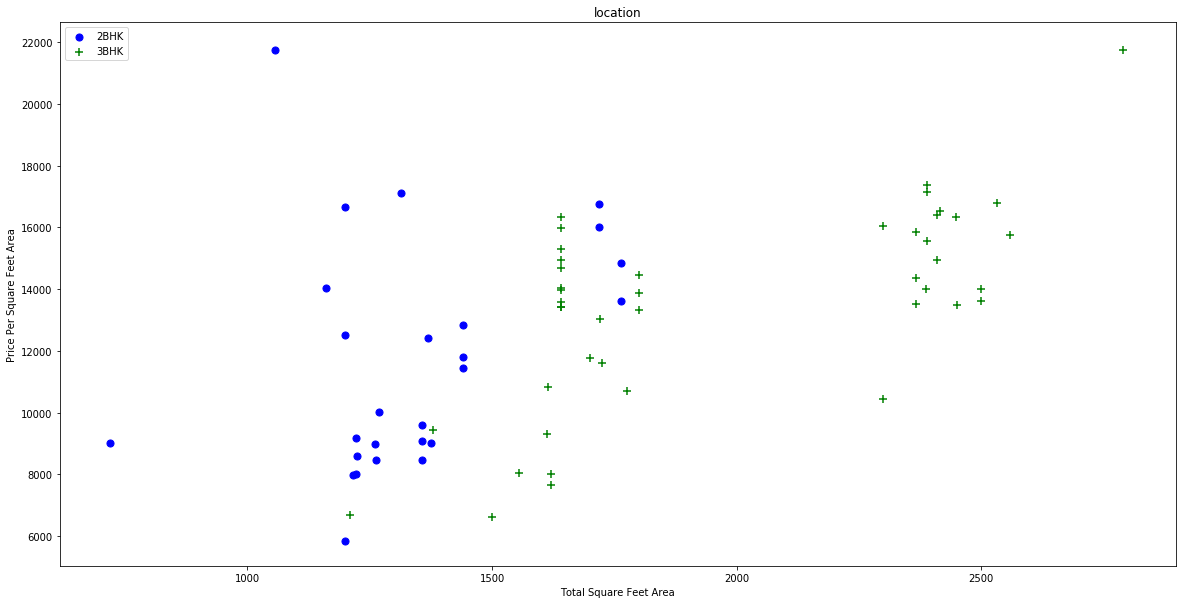

In [71]:
plot_scatter_chart(num,'Rajaji Nagar')

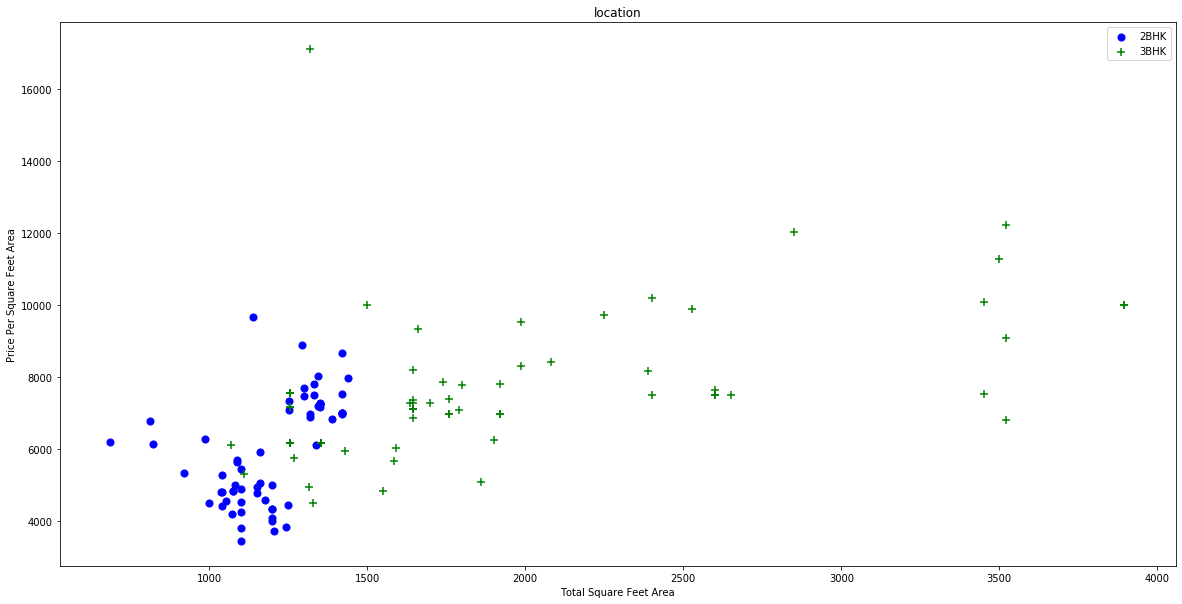

In [72]:
plot_scatter_chart(num,'Hebbal')

<strong>
There are many such cases where the price for a 2 bhk is higher than 3 <br>
Remove all such points<br>

We remove properties where for same location the price of 3 bhk is less than 2 bhk (with same sq_ft_area).<br>
    For a given location, we will build a dictionary of stats per bhk.
    
Now wecan remove those 2 bhk apartmentswhose price_per_sqft is less than mean price_per_sqftof 1 Bhk apartment
    
    
    {
       '1': {
              'mean':4000,
              'std': 2000,
              'count':34
            }
       '2': {
              'mean':4300,
              'std': 2300,
              'count':22
            }


In [76]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for locations,locations_df in df.groupby('locations'):
        bhk_stats={}
        for bhk,bhk_df in locations_df.groupby('bhk'):
            bhk_stats[bhk]={
            'mean': np.mean(bhk_df.preice_per_sq_ft),
            'std': np.std(bhk_df.preice_per_sq_ft),
            'count': bhk_df.shape[0]
        }
        for bhk, bhk_df in locations_df.groupby('bhk'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.preice_per_sq_ft<(stats['mean'])].index.values)        
    return df.drop(exclude_indices, axis='index')     
        
           

In [78]:
df5= remove_bhk_outliers(num)

In [79]:
df5.shape

(8773, 6)

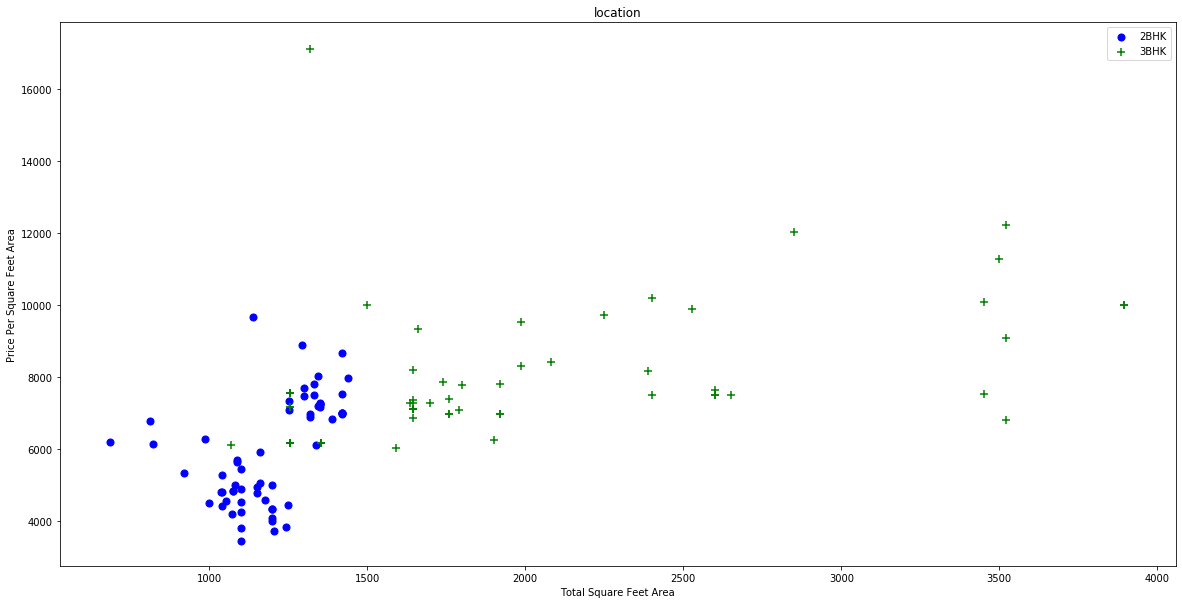

In [81]:
plot_scatter_chart(df5,'Hebbal')
# look at the green dots some have been removed

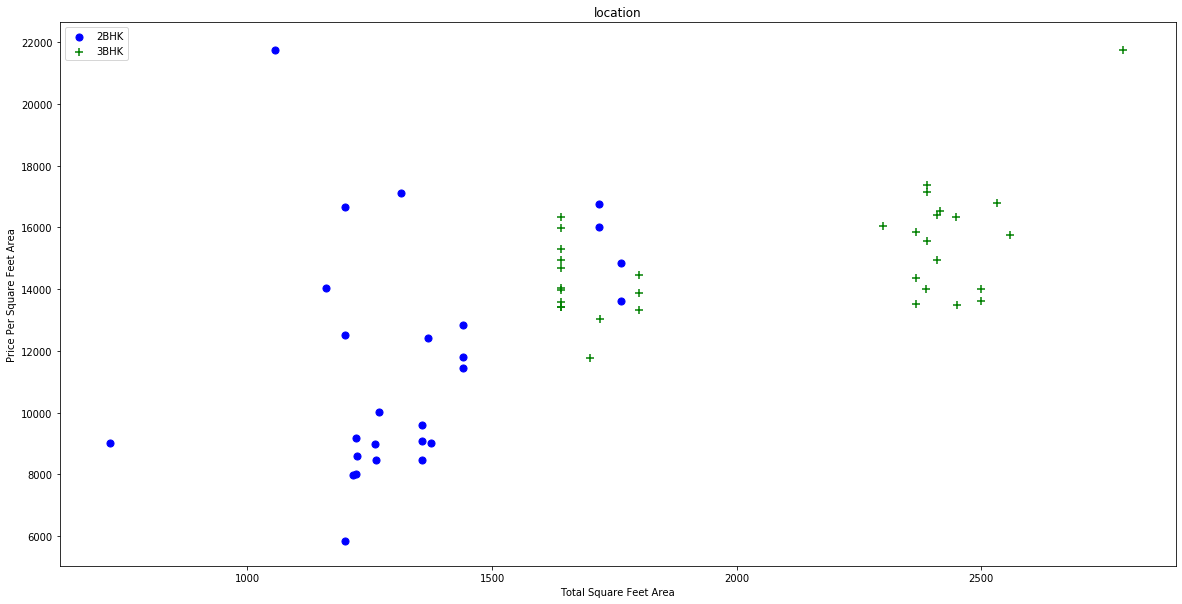

In [82]:
plot_scatter_chart(df5,'Rajaji Nagar') 
# look at the green dots some have been removed

Text(0, 0.5, 'Count')

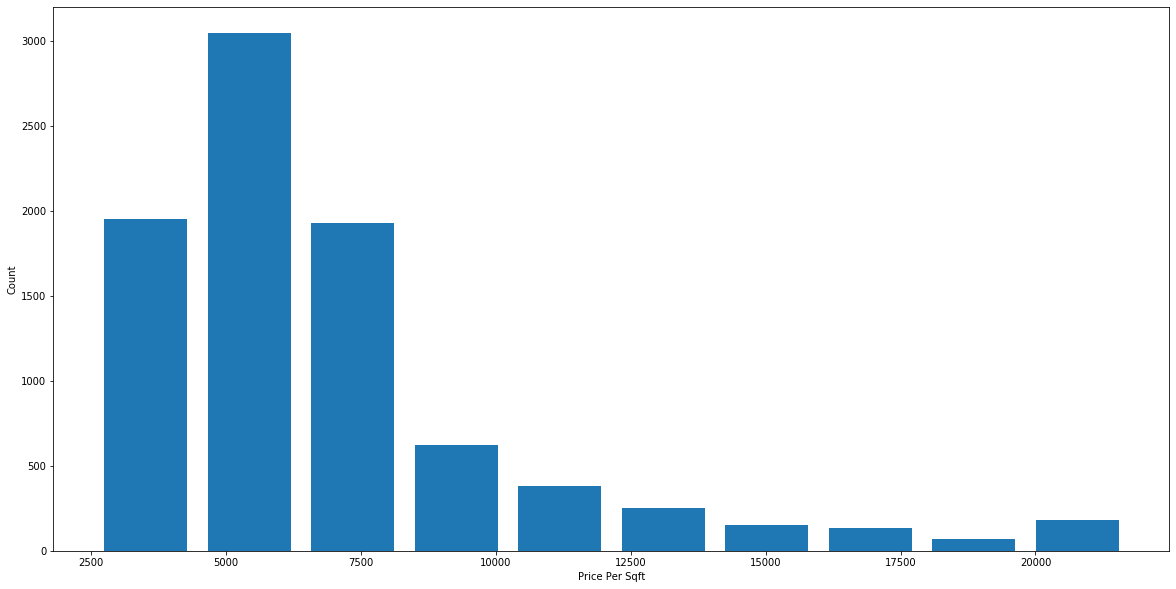

In [84]:
# Historam

plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.preice_per_sq_ft,rwidth=0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")



In [85]:
# checking the number of bathroom.
df5.bath.unique()

array([2., 3., 4., 5., 1., 6.])

Text(0, 0.5, 'Count')

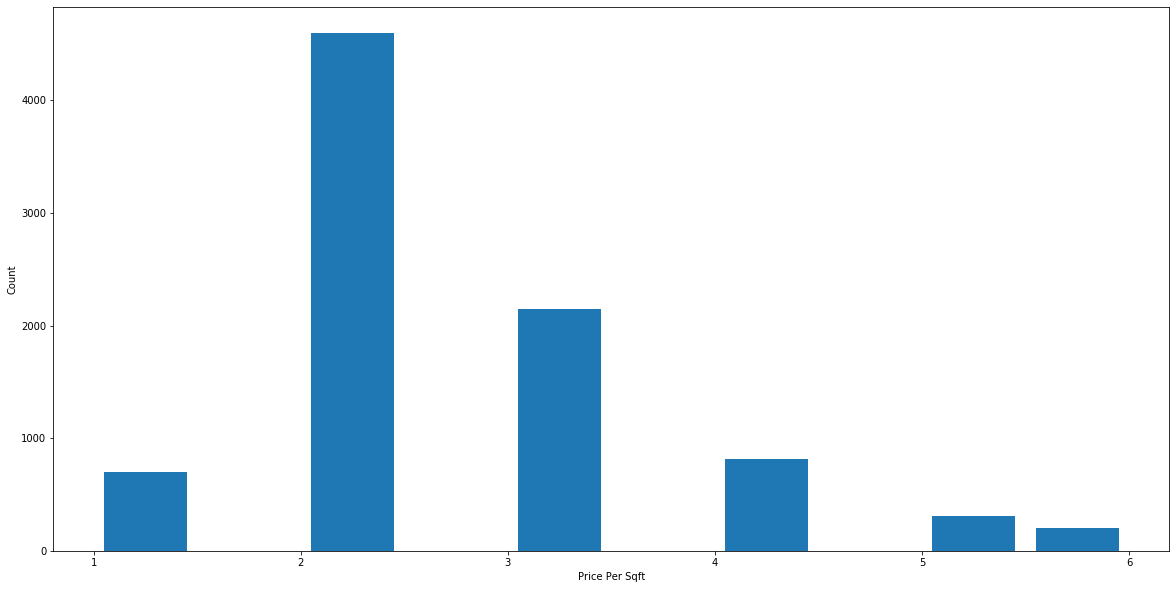

In [89]:
#Histogram for bathroom


plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")

In [92]:
df5.head()

,total_sqft,bath,price,bhk,preice_per_sq_ft,locations
0,1056.0,2.0,39.07,2,3699.810606,Electronic City Phase II
2,1440.0,2.0,62.00,3,4305.555556,Uttarahalli
3,1521.0,3.0,95.00,3,6245.890861,Lingadheeranahalli
4,1200.0,2.0,51.00,2,4250.000000,Kothanur
6,2732.0,4.0,204.00,4,7467.057101,Old Airport Road


In [94]:
# dropping preice_per_sq_ft as that was only for stats checking/outlier detection
df6= df5.drop(columns=['preice_per_sq_ft'],axis=1)

In [95]:
df6.head()

,total_sqft,bath,price,bhk,locations
0,1056.0,2.0,39.07,2,Electronic City Phase II
2,1440.0,2.0,62.00,3,Uttarahalli
3,1521.0,3.0,95.00,3,Lingadheeranahalli
4,1200.0,2.0,51.00,2,Kothanur
6,2732.0,4.0,204.00,4,Old Airport Road


In [97]:
# One Hot encoding
dummies= pd.get_dummies(df6.locations)

In [98]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df7= pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')

In [100]:
df7.head()

,total_sqft,bath,price,bhk,locations,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,Electronic City Phase II,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,Uttarahalli,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,Lingadheeranahalli,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,Kothanur,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,Old Airport Road,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df8=df7.drop(columns=['locations'],axis=1)
df8.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df8.shape

(8773, 245)

In [118]:
df8.isnull().sum()

total_sqft             46
bath                    0
price                   0
bhk                     0
1st Block Jayanagar     0
                       ..
Yelachenahalli          0
Yelahanka               0
Yelahanka New Town      0
Yelenahalli             0
Yeshwanthpur            0
Length: 245, dtype: int64

In [119]:
df9=df8.dropna()

In [120]:
df9.isnull().sum()

total_sqft             0
bath                   0
price                  0
bhk                    0
1st Block Jayanagar    0
                      ..
Yelachenahalli         0
Yelahanka              0
Yelahanka New Town     0
Yelenahalli            0
Yeshwanthpur           0
Length: 245, dtype: int64

In [122]:
x=df9.drop(columns=['price'],axis=1)
y=df9.price

In [123]:
print(x.head(3))
print("-------------------------------------------------------------")
print('DV')
print("-------------------------------------------------------------")
print(y.head(3))

   total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      1056.0   2.0    2                    0                   0   
2      1440.0   2.0    3                    0                   0   
3      1521.0   3.0    3                    0                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
2                   0                   0  ...            0   
3                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
2                    

## Spilting data

In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [125]:
x_train.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
11396,3381.0,6.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7932,650.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5940,2336.5,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3739,1357.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3025,1419.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [128]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.7128621188531417

## K-Fold CV

In [129]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.75382959, 0.76342486, 0.73795047, 0.75432829, 0.70513299])

# Grid Search CV

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [137]:
def find_best_model_using_gridsearchcv(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True, False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
                
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }        
        
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [138]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.742933,{'normalize': True}
1,lasso,0.656387,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.623011,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [139]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [140]:
np.where(x.columns=='5th Phase JP Nagar')[0][0]

8

In [152]:
# Function for property price prediction

def predict_price(location,sqft,bath,bhk):
       
    loc_index = np.where(x.columns==location)[0][0]
    
    a = np.zeros(len(x.columns))   
    
    a[0]= sqft
    a[1]= bath
    a[2]= bhk
    if loc_index >= 0:
        a[loc_index]=1
        
    return reg.predict([a])[0]

In [153]:
predict_price('1st Phase JP Nagar',1000,2,2)

118.90543371567445

In [154]:
predict_price('1st Phase JP Nagar',1000,3,3)

133.39767068884845

In [155]:
predict_price('Indira Nagar',1000,2,2)

172.41086163834757

In [156]:
# Exporting the model to pickle file

import pickle
with open('Banglore_home_price_prediction.pickle','wb') as f:
    pickle.dump(reg,f)

In [157]:
# We need the columns info

import json
columns={
    'date_columns':[col.lower() for col in x.columns]
}

with open("columns.json",'w') as f:
    f.write(json.dumps(columns))